In [1]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

In [2]:
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
# Make sure to add the names of the variables to both dataframes.
columns = ['age','sex','cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal','num']


 # you can find the column names in the file 'data/heart-disease.names'.
# Select the correct column names for the dataset, as described in the file.

cleveland = pd.read_csv('..\\data\\cleveland.data', names=columns)  # change this
test = pd.read_csv('..\\data\\switzerland.data', names=columns)       # change this

In [3]:
# do not delete this!
cleveland.head(5)


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0

In [4]:
# do not delete this!
test.head(5)


age  sex   cp  trestbps  chol fbs restecg  thalach  exang  oldpeak slope  \
0  32.0  1.0  1.0      95.0   0.0   ?       0    127.0    0.0      0.7     1   
1  34.0  1.0  4.0     115.0   0.0   ?       ?    154.0    0.0      0.2     1   
2  36.0  1.0  4.0     110.0   0.0   ?       0    125.0    1.0      1.0     2   
3  38.0  0.0  4.0     105.0   0.0   ?       0    166.0    0.0      2.8     1   
4  38.0  0.0  4.0     110.0   0.0   0       0    156.0    0.0      0.0     2   

  ca thal  num  
0  ?    ?  1.0  
1  ?    ?  1.0  
2  ?    6  1.0  
3  ?    ?  2.0  
4  ?    3  1.0

In [5]:
# if you want to see information about the dataset, uncomment:
cleveland.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    60.270627    0.679868    3.158416  131.689769  246.693069    0.148515   
std     77.296578    0.467299    0.960126   17.599748   51.776918    0.356198   
min      0.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max    999.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003    0.469794    1.161075    0.616226    1.228536  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    2.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    4.000000

In [6]:
# if you want to see information about the dataset, uncomment:
test.describe()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       122 non-null    float64
 1   sex       117 non-null    float64
 2   cp        117 non-null    float64
 3   trestbps  117 non-null    float64
 4   chol      117 non-null    float64
 5   fbs       117 non-null    object 
 6   restecg   117 non-null    object 
 7   thalach   117 non-null    float64
 8   exang     117 non-null    float64
 9   oldpeak   117 non-null    float64
 10  slope     117 non-null    object 
 11  ca        117 non-null    object 
 12  thal      117 non-null    object 
 13  num       117 non-null    float64
dtypes: float64(9), object(5)
memory usage: 13.5+ KB


In [7]:
test['trestbps'].unique()


#'age' =0 and 999
#'sex' = nan
#'cp' = nan
#'trestbps' = nan, 
#chol = nan and 0
#fbs = '?', nan
#restecg =  '?', nan
#thalach = nan
#exang = nan
#oldpeak = nan
#slope = '?', nan
#ca = '?', nan
#thal = '?', nan
#num = nan

array([ 95., 115., 110., 105., 100., 135., 125., 145., 140., 155., 160.,
       120., 130., 165.,  80., 180., 170., 200., 150., 185.,  nan])

<function matplotlib.pyplot.show(close=None, block=None)>

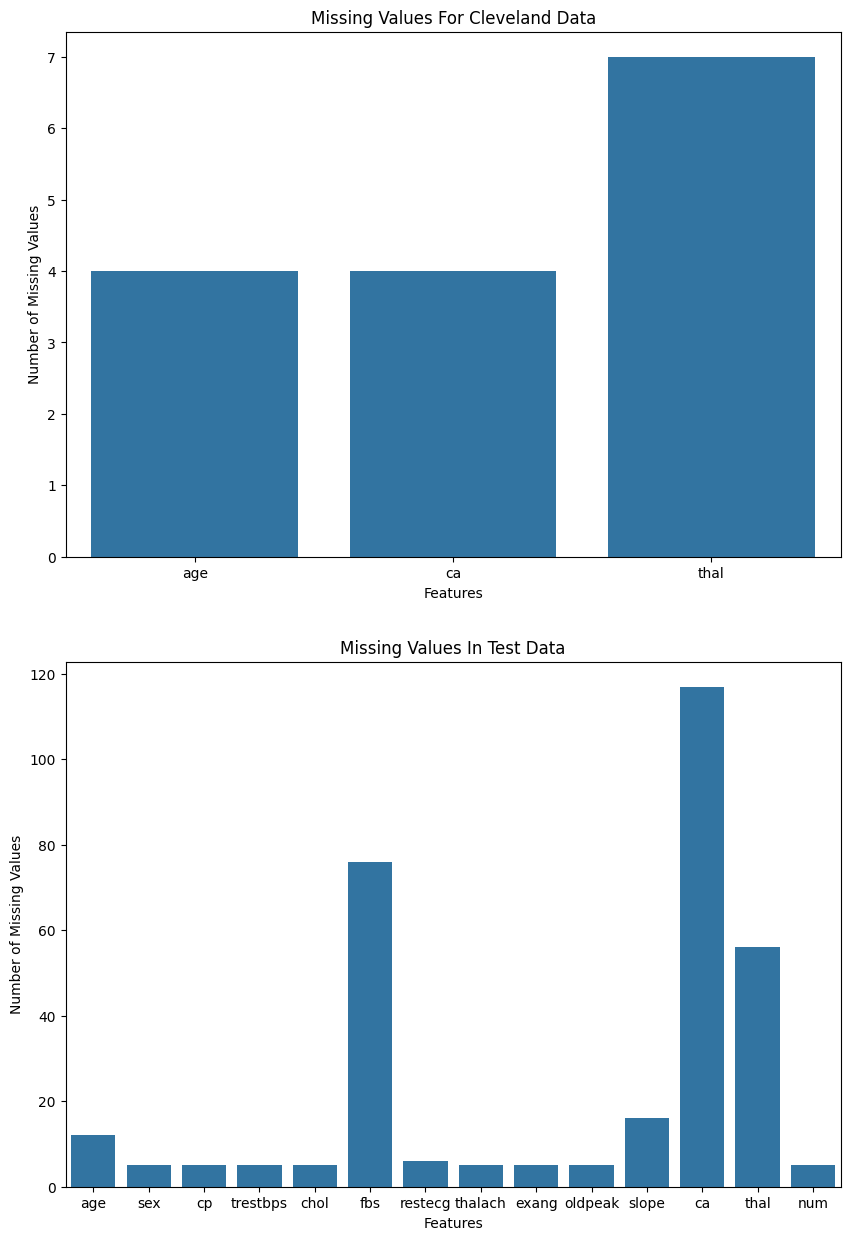

In [29]:
# Create 1 figure with a set of 2 subplots. Each axes should contain a figure as described below: 
# subplot 1: A barplot with the missing valies for each attribute in the dataset 'cleveland'
# subplot 2: A barplot with the missing valies for each attribute in the dataset 'test'

# Write your code here

missing_columns_cleveland = cleveland[['age', 'ca', 'thal']].copy()
col_names_cleveland_missing = missing_columns_cleveland.columns

age_missing = ((cleveland['age']==0 )| (cleveland['age']==999)).sum()
ca_missing = (cleveland['ca']=='?').sum()
thal_missing = ((cleveland['thal']== '?') | (cleveland['thal']=='!')).sum()

number_of_missing_values_df = pd.DataFrame([age_missing,ca_missing, thal_missing], index=col_names_cleveland_missing, columns=['number_of_missing_values'])
 
list_of_missing_symbols = [ '?']
test_missing_values_as_list_of_list = []
missing_columns_test = []
for col in columns: 
    x=test[col].isna().sum()+test[col].isin(list_of_missing_symbols).sum()
    if col == 'age':
        x+= test[col].isin([0,999]).sum()
    if x>0:
        test_missing_values_as_list_of_list.append(int(x))
        missing_columns_test.append(col)



missing_values_test_as_df = pd.DataFrame(test_missing_values_as_list_of_list, index=missing_columns_test, columns=['number_of_missing_values'] )


fig, ax = plt.subplots(2, 1, figsize=(10,15))

sns.barplot(x=number_of_missing_values_df.index, y='number_of_missing_values', data=number_of_missing_values_df, ax=ax[0])
sns.barplot(x=missing_values_test_as_df.index, y='number_of_missing_values', data=missing_values_test_as_df, ax=ax[1])

ax[0].set_title('Missing Values For Cleveland Data')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Number of Missing Values')

ax[1].set_title('Missing Values In Test Data')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Number of Missing Values')
plt.show



In [32]:
cleveland['fbs'].unique()

array([1., 0.])